In [1]:
%matplotlib inline
### Standard imports
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
### Settings
hf.DefaultSetup()

def PrintKeys(fileName):
    for k in uproot.open(fileName).allkeys():
        print(k)
        
def OpenRoot(fileName,tree):
    rTree = uproot.open(fileName)[tree]
    df = rTree.pandas.df(['*'],flatten=False,namedecode='utf-8')
    return df

# Special trick for string columns
def decodeList(l):
    return [x.decode(encoding='UTF-8') for x in l]

In [2]:
dirPath = '/Users/sdporzio/1_CurrentWork/depth/DepthTree.root'
po210_f = OpenRoot(dirPath,'Po210')
pb214_f = OpenRoot(dirPath,'Pb214')
pb210_f = OpenRoot(dirPath,'Pb210')
pb206_f = OpenRoot(dirPath,'Pb206')

In [3]:
lim = 1000
po210 = po210_f[0:lim]
pb214 = pb214_f[0:lim]
pb210 = pb210_f[0:lim]
pb206 = pb206_f[0:lim]

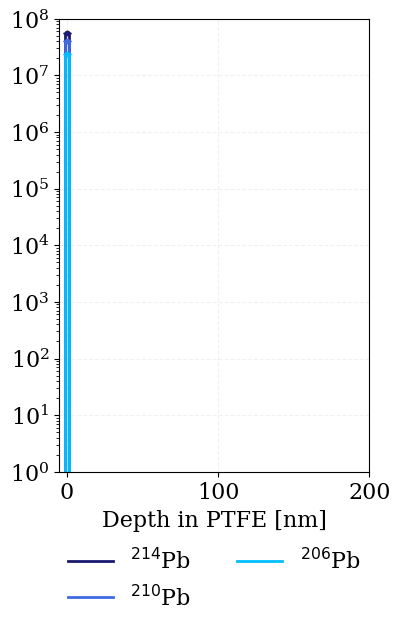

In [6]:
xlim = [-5,200]
nbins = 100
yLog = True

plt.figure(figsize=(4,6),facecolor='white',dpi=100)
hp.HepHist(pb214_f.query('depth<0.0001')['depth'],xlims=xlim,yLog=yLog,nbins=nbins,color='midnightblue',label=r'$^{214}$Pb')
hp.HepHist(pb210_f.query('depth<0.0001')['depth'],xlims=xlim,yLog=yLog,nbins=nbins,color='royalblue',label=r'$^{210}$Pb')
hp.HepHist(pb206_f.query('depth<0.0001')['depth'],xlims=xlim,yLog=yLog,nbins=nbins,color='deepskyblue',label=r'$^{206}$Pb')
if(yLog): plt.ylim(1e0,1e8)
plt.xlim(xlim)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.xlabel('Depth in PTFE [nm]')
plt.show()